<a href="https://colab.research.google.com/github/gyiernahfufie/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kneed

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
#Checks missing values
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
cluster                   0
dtype: int64

In [32]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100),cluster
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,1.355000
std,13.969007,26.264721,25.823522,1.046158
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,2.000000
75%,49.000000,78.000000,73.000000,2.000000
max,70.000000,137.000000,99.000000,3.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
 4   cluster                 200 non-null    int32 
dtypes: int32(1), int64(3), object(1)
memory usage: 7.2+ KB


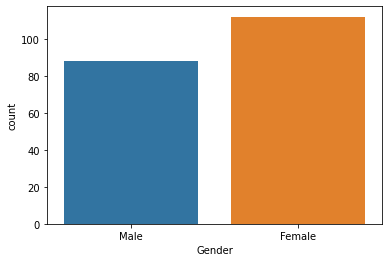

In [34]:
sns.countplot(x = df.Gender)

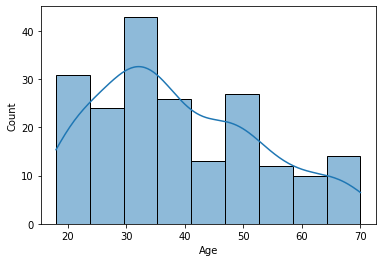

In [36]:
sns.histplot(df.Age, kde = True)

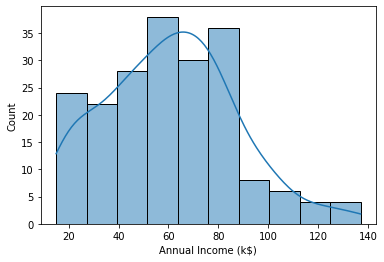

In [37]:
sns.histplot(df['Annual Income (k$)'], kde = True)

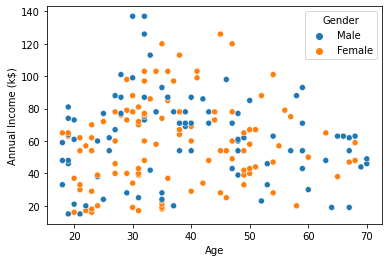

In [39]:
sns.scatterplot( y= df['Annual Income (k$)'], x = df.Age, hue = df.Gender)

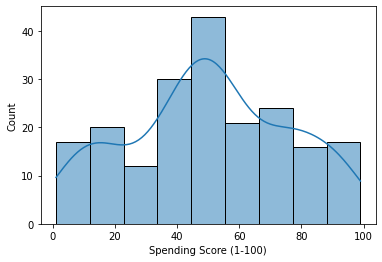

In [40]:
sns.histplot(df['Spending Score (1-100)'], kde = True)

In [5]:
#Standardizing data
col_names = ['Annual Income (k$)','Age','Spending Score (1-100)']
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features,columns = col_names)
scaled_features.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980


In [6]:
#Encoding gender variable 
gender = df['Gender']
newdf = scaled_features.join(gender)
newdf = pd.get_dummies(newdf, prefix = None, prefix_sep = '_',
                       dummy_na = False, columns = None, sparse = False,
                       drop_first = False, dtype = None)

In [7]:
newdf = newdf.drop(['Gender_Male'], axis = 1)
newdf.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female
0,-1.738999,-1.424569,-0.434801,0
1,-1.738999,-1.281035,1.195704,0
2,-1.700830,-1.352802,-1.715913,1
3,-1.700830,-1.137502,1.040418,1
4,-1.662660,-0.563369,-0.395980,1


In [8]:
#Creating clustering model
SSE = []
for cluster in range(1,10):
  kmeans = KMeans(n_jobs = -1, n_clusters= cluster, init = 'k-means++')
  kmeans.fit(newdf)
  SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

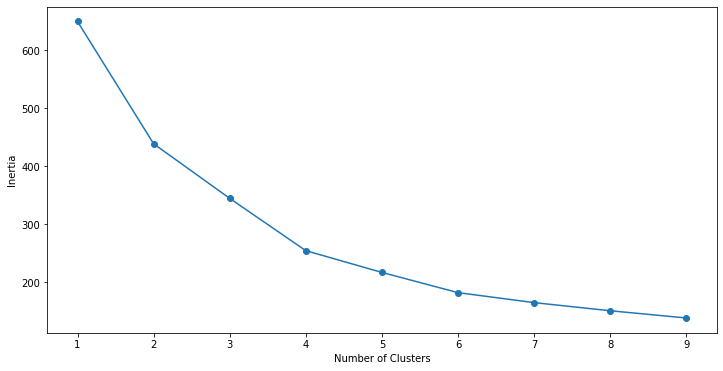

In [9]:
#Converting results into dataframe and plotting them
frame = pd.DataFrame({'Cluster': range(1,10), "SSE": SSE})
plt.figure(figsize = (12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [10]:
#Creating model with 4 clusters
kmeans = KMeans(n_jobs = -1, n_clusters = 4, init = 'k-means++')
kmeans.fit(newdf)

print(silhouette_score(newdf, kmeans.labels_, metric = 'euclidean'))

0.35027020434653977


In [11]:
clusters = kmeans.fit_predict(newdf.iloc[:,1:])
newdf['label'] = clusters

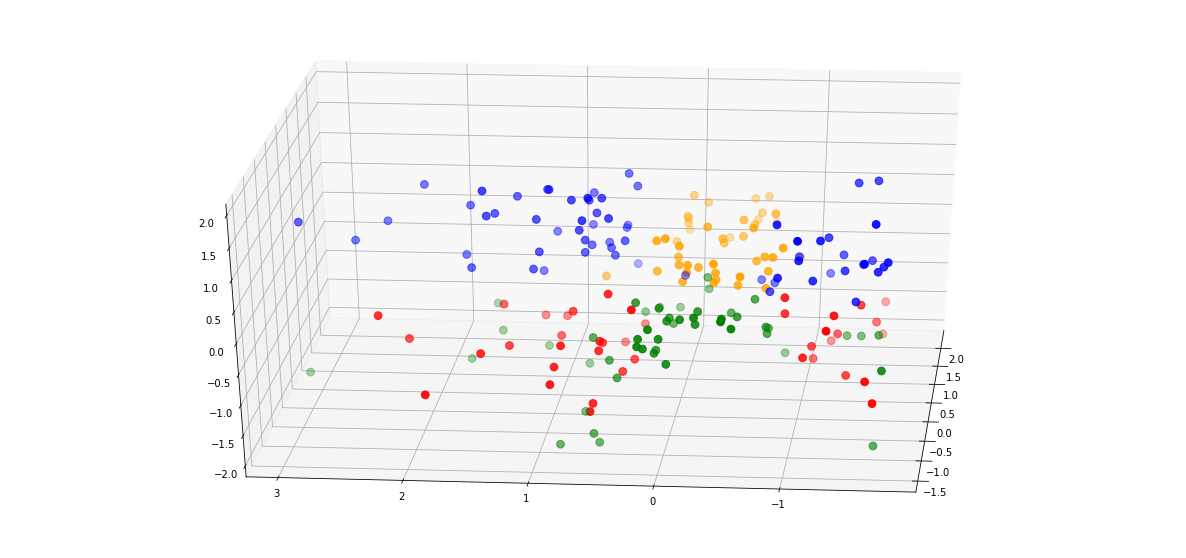

In [12]:
fig = plt.figure(figsize = (21, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], 
           newdf["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)
ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], 
           newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], 
           newdf["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], 
           newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

In [13]:
#Creating 2nd clustering model with better cluster separability
#runs PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(newdf)

features = range(pca.n_components_)

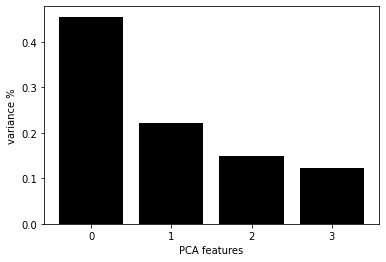

In [14]:
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

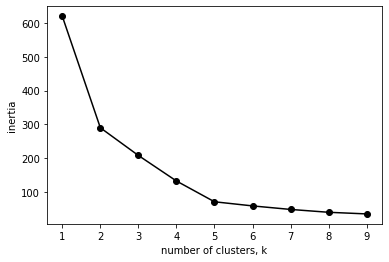

In [15]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [16]:
model = KMeans(n_clusters = 4)
model.fit(PCA_components.iloc[:,:2])

print(silhouette_score(PCA_components.iloc[:,:2],
                       model.labels_, metric = 'euclidean'))

0.49034550683367756


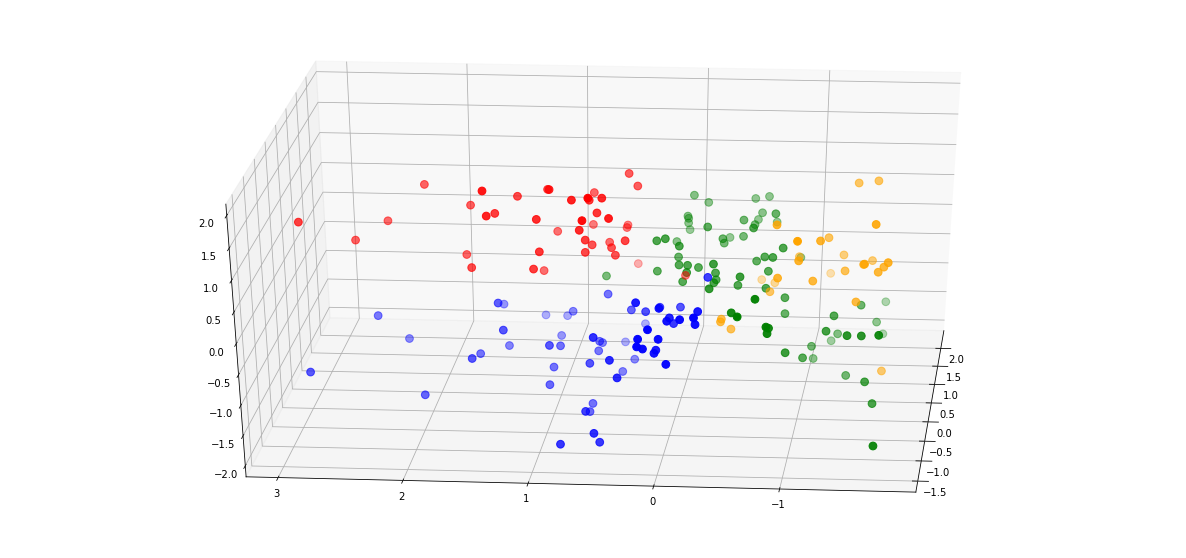

In [24]:
model = KMeans(n_clusters=4)

clusters = model.fit_predict(PCA_components.iloc[:,:2])
newdf["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], newdf["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)
ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], newdf["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)

ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

In [25]:
#Cluster Analysis
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')
df = df.drop(['CustomerID'],axis=1)

pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


In [26]:
#Visualizing average for all 
avg_df = frame.groupby(['cluster'], as_index=False).mean()
avg_df

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,34.793103,77.603448,29.206897
1,1,32.902439,85.414634,81.000000
2,2,50.794521,45.273973,40.356164
3,3,24.821429,28.714286,74.250000


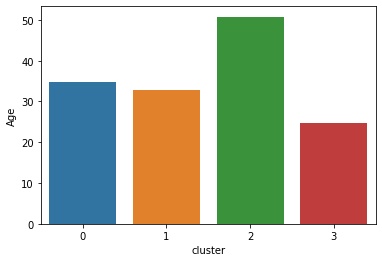

In [27]:
sns.barplot(x='cluster',y='Age',data=avg_df)

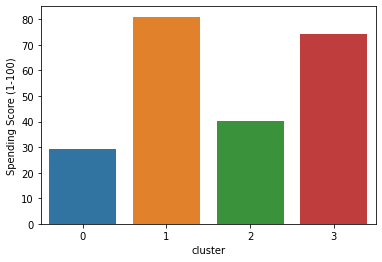

In [28]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)


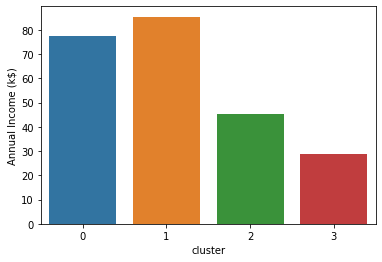

In [29]:
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)

In [30]:
df2 = pd.DataFrame(frame.groupby(['cluster','Gender'])['Gender'].count())
df2

Gender
cluster Gender        
0       Female      30
        Male        28
1       Female      23
        Male        18
2       Female      45
        Male        28
3       Female      14
        Male        14

With reference to:
https://www.natasshaselvaraj.com/customer-segmentation-with-python/

Dataset from:
https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python